## 4. Analyse Data - Deep Dive
Now that we know the sub-groups of people with a MH condition let's analyse the employment related data that influence this condition the most. I'll use the "self-employed", "remote-work" and "tech-company" columns.

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('survey_clean.csv', index_col=0)
data.head()

Country   Age Gender self_employed family_history treatment  \
0   United States  37.0  woman           NaN             No       Yes   
1   United States  44.0    man           NaN             No        No   
2          Canada  32.0    man           NaN             No        No   
3  United Kingdom  31.0    man           NaN            Yes       Yes   
4   United States  31.0    man           NaN             No        No   

  work_interfere    no_employees remote_work tech_company  ...   anonymity  \
0          Often            6-25          No          Yes  ...         Yes   
1         Rarely  More than 1000          No           No  ...  Don't know   
2         Rarely            6-25          No          Yes  ...  Don't know   
3          Often          26-100          No          Yes  ...          No   
4          Never         100-500         Yes          Yes  ...  Don't know   

                leave mental_health_consequence phys_health_consequence  \
0       Somewhat easy                        No                      No   
1          Don't know                     Maybe                      No   
2  Somewhat difficult                        No                      No   
3  Somewhat difficult                       Yes                     Yes   
4          Don't know                        No                      No   

      coworkers supervisor mental_health_interview phys_health_interview  \
0  Some of them        Yes                      No                 Maybe   
1            No         No                      No                    No   
2           Yes        Yes                     Yes                   Yes   
3  Some of them         No                   Maybe                 Maybe   
4  Some of them        Yes                     Yes                   Yes   

  mental_vs_physical obs_consequence  
0                Yes              No  
1         Don't know              No  
2                 No              No  
3                 No             Yes  
4         Don't know              No  

[5 rows x 24 columns]

#### Resume self-employed data

In [3]:
self_employed = data[['self_employed','treatment']][data['treatment'] == 'Yes'].groupby('self_employed').count()
self_employed.reset_index(inplace=True)
self_employed.columns = ['Answer','Self-employed']
self_employed

Answer  Self-employed
0     No            521
1    Yes             66

#### Resume remote work data

In [4]:
remote_work = data[['remote_work','treatment']][data['treatment'] == 'Yes'].groupby('remote_work').count()
remote_work.reset_index(inplace=True)
remote_work.columns = ['Answer','Remote work']
remote_work

Answer  Remote work
0     No          412
1    Yes          184

#### Resume tech company data

In [5]:
tech_company = data[['tech_company','treatment']][data['treatment'] == 'Yes'].groupby('tech_company').count()
tech_company.reset_index(inplace=True)
tech_company.columns = ['Answer','Tech company']
tech_company

Answer  Tech company
0     No           119
1    Yes           477

#### Merge the resumed data and re-arrange it for plotting

In [6]:
influences = pd.merge(self_employed, remote_work, on='Answer')
influences = pd.merge(influences, tech_company, on='Answer')
influences

Answer  Self-employed  Remote work  Tech company
0     No            521          412           119
1    Yes             66          184           477

In [7]:
influences.loc[2] = influences.sum()
influences.loc[2, 'Answer'] = 'Total'
influences

Answer  Self-employed  Remote work  Tech company
0     No            521          412           119
1    Yes             66          184           477
2  Total            587          596           596

In [8]:
influences['% Self-employed'] = round(influences['Self-employed'] / influences.loc[2, 'Self-employed'] * 100, 1)
influences['% Remote work'] = round(influences['Remote work'] / influences.loc[2, 'Remote work'] * 100, 1)
influences['% Tech company'] = round(influences['Tech company'] / influences.loc[2, 'Tech company'] * 100, 1)
influences

Answer  Self-employed  Remote work  Tech company  % Self-employed  \
0     No            521          412           119             88.8   
1    Yes             66          184           477             11.2   
2  Total            587          596           596            100.0   

   % Remote work  % Tech company  
0           69.1            20.0  
1           30.9            80.0  
2          100.0           100.0

In [9]:
influences.drop(index=2, columns=['Self-employed','Remote work','Tech company'], inplace=True)
influences.columns = ['% Answer','Self-employed','Remote work','Tech company']
influences

% Answer  Self-employed  Remote work  Tech company
0       No           88.8         69.1          20.0
1      Yes           11.2         30.9          80.0

In [10]:
influences = influences.transpose()
influences.columns = ['No', 'Yes']
influences.reset_index(inplace=True)
influences.drop(0, inplace=True)
influences

index    No   Yes
1  Self-employed  88.8  11.2
2    Remote work  69.1  30.9
3   Tech company    20    80

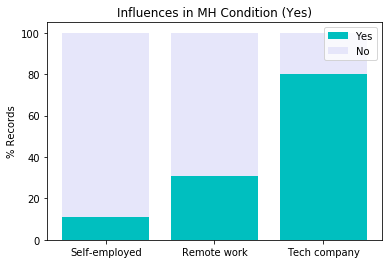

In [11]:
yes = plt.bar(influences['index'], influences['Yes'], color='c')
no = plt.bar(influences['index'], influences['No'], bottom=[11.2,30.9,80.0], color='lavender')
plt.ylabel('% Records')
plt.title('Influences in MH Condition (Yes)')
plt.legend((yes,no),('Yes','No'))
plt.show()

Conclusion: from this chart we can see that among the people with a MH condition there are few self-employed, some working remotely and many working in a tech company. So there seems to be a strong direct relation between having a MH condition and working in Tech!